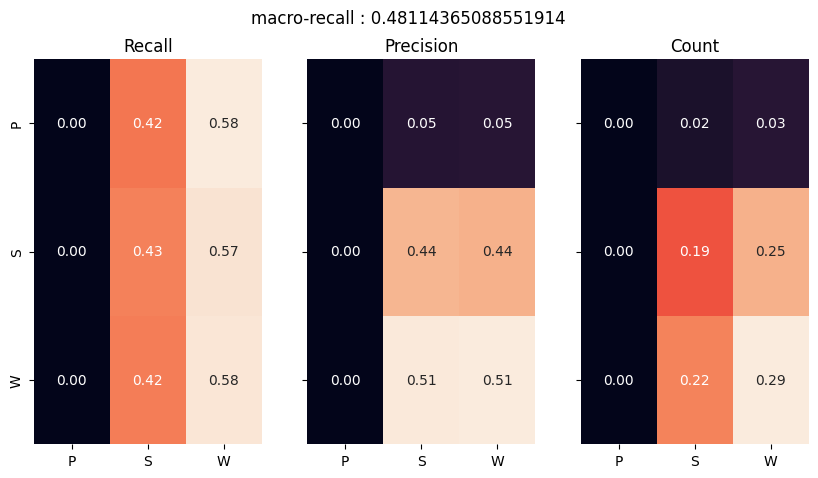

In [2]:
import torch
from lib.utils import load_raw_list,cms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from lib.models import CNN_0
from torch.nn.functional import relu,one_hot,softmax

model = torch.load(f='model.pt')

X,y = load_raw_list([0,1,2,3,4])
X = X.reshape(-1,1,5000)

dataloader = DataLoader(TensorDataset(X,y), batch_size=64, shuffle=True)

y_pred = torch.Tensor().cuda()
for (X,_) in dataloader:
    y_pred = torch.cat([y_pred,softmax(model(X.cuda()),dim=1).argmax(axis=1)])
y_pred = y_pred.cpu()

cms(y_true=y,y_pred=y_pred)